In [25]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import normalize
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('D:\Study\PythonPrj\pythonProject\Data_Science\Cars\convert_number_data_final.csv')
# df = df.drop(['curbWeight', 'vEengineDisplacement'], axis=1)
df = df[df['price'].notna()]
df.head()

,accelerationTime,bodyType,brand,cargoVolume,curbWeight,driveWheelConfiguration,eLabel,emissionsCO2,engineCapacity,fuelCapacity,...,seatingCapacity,speed,torque,vEengineDisplacement,vEenginePower,vEengineType,vehicleTransmission,weightTotal,wheelbase,width
0,6.8,3,4,1020.0,1375.0,1,6.0,218.0,1781.0,55.0,...,5.0,238.0,270.0,1781.0,154.0,1,2,1935.0,2519.0,1763.0
1,7.8,7,4,1680.0,1745.0,1,2.0,115.0,1968.0,73.0,...,5.0,241.0,400.0,1968.0,150.0,1,1,2425.0,2924.0,1886.0
2,9.2,7,30,1668.0,1188.0,0,4.0,146.0,1798.0,50.0,...,5.0,210.0,174.0,1798.0,104.0,1,2,1790.0,2595.0,1770.0
3,9.5,7,4,1680.0,1685.0,0,1.0,109.0,1968.0,73.0,...,5.0,219.0,370.0,1968.0,120.0,1,1,2330.0,2924.0,1886.0
4,7.0,7,4,1680.0,1680.0,0,2.0,144.0,1984.0,73.0,...,5.0,250.0,370.0,1984.0,180.0,1,1,2310.0,2924.0,1886.0


In [27]:
df.shape

(75824, 30)

In [28]:
df.columns

Index(['accelerationTime', 'bodyType', 'brand', 'cargoVolume', 'curbWeight',
       'driveWheelConfiguration', 'eLabel', 'emissionsCO2', 'engineCapacity',
       'fuelCapacity', 'fuelConsumption', 'fuelType', 'height', 'length',
       'modelDate', 'numberOfDoors', 'numberOfForwardGears', 'payload',
       'price', 'roofLoad', 'seatingCapacity', 'speed', 'torque',
       'vEengineDisplacement', 'vEenginePower', 'vEengineType',
       'vehicleTransmission', 'weightTotal', 'wheelbase', 'width'],
      dtype='object')

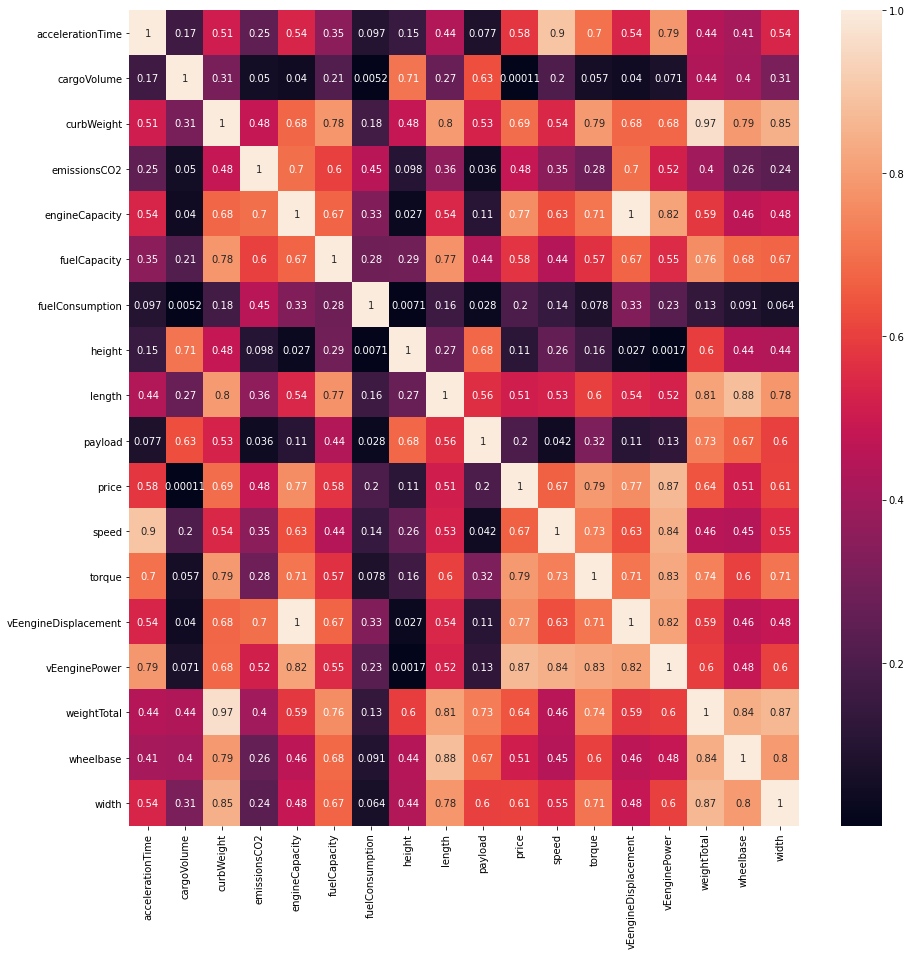

In [29]:
dataNumerical = df.drop(["bodyType", "brand", "driveWheelConfiguration", "eLabel",
         "fuelType", "modelDate", "numberOfDoors", "numberOfForwardGears",
         "seatingCapacity", "vEengineType", "roofLoad",
         "vehicleTransmission"], axis=1)
plt.subplots(figsize = (15, 15))
sns.heatmap(np.abs(dataNumerical.corr()), annot=True)
plt.savefig("CorrelationMatrix.png", dpi=150)

In [30]:
# df = df.drop(['curbWeight', 'vEengineDisplacement', 'vEengineType'], axis=1)

In [31]:
# seating Capacity: fill with most occuring
categorical_features = ["bodyType", "brand", "driveWheelConfiguration", "eLabel",
         "fuelType", "modelDate", "numberOfDoors", "numberOfForwardGears",
         "seatingCapacity", "vEengineType", "roofLoad",
         "vehicleTransmission"]

In [32]:
df['roofLoad'].isna().sum()

11126

In [33]:
print(df['roofLoad'].value_counts())
print(f"Most frequency value: {df['roofLoad'].value_counts().index[0]}")
# fill with most frequency
df['roofLoad'] = df['roofLoad'].fillna(df['roofLoad'].value_counts().index[0])

75.0     24728
100.0    21775
50.0      5787
80.0      4963
90.0      1408
70.0      1357
60.0       987
0.0        837
65.0       813
150.0      589
200.0      262
68.0       195
85.0       123
55.0       116
40.0        98
300.0       92
35.0        88
30.0        85
45.0        73
78.0        43
72.0        41
210.0       37
25.0        28
140.0       25
170.0       24
103.0       24
37.0        21
20.0        16
57.0        13
280.0       12
34.0        10
74.0        10
120.0        6
48.0         6
454.0        2
81.0         2
550.0        1
475.0        1
Name: roofLoad, dtype: int64
Most frequency value: 75.0


In [34]:
# bodyType
df['bodyType'].isna().sum()

0

In [35]:
# brand
df['brand'].isna().sum()

0

In [36]:
df['driveWheelConfiguration'].isna().sum()

0

In [37]:
# eLabel
df['eLabel'].isna().sum()

14001

In [38]:
# elabel list: ['a', 'b', 'c', 'd', 'e', 'f', 'g']
print(df['eLabel'].value_counts())
print(f"Most frequency value: {df['eLabel'].value_counts().index[0]}")
# fill with most frequency
df['eLabel'] = df['eLabel'].fillna(df['eLabel'].value_counts().index[0])

6.0    35020
4.0     6103
3.0     6064
5.0     6022
2.0     5221
1.0     2490
0.0      903
Name: eLabel, dtype: int64
Most frequency value: 6.0


In [39]:
df['fuelType'].isna().sum()

137

In [40]:
# fuel type list
#  ['Bio ethanol', 'Bio ethanol / gasoline', 'Diesel', 'Gasoline', 'LPG', 'LPG / gasoline',
#  'Natural gas', 'Natural gas / gasoline']
print(df['fuelType'].value_counts())
print(f"Most frequency value: {df['fuelType'].value_counts().index[0]}")
# fill with most frequency
df['fuelType'] = df['fuelType'].fillna(df['fuelType'].value_counts().index[0])

3.0    46571
2.0    28035
0.0      390
7.0      204
5.0      192
6.0      130
4.0       93
1.0       72
Name: fuelType, dtype: int64
Most frequency value: 3.0


In [41]:
df['modelDate'].isna().sum()

0

In [42]:
df['numberOfDoors'].isna().sum()

0

In [43]:
df['numberOfForwardGears'].isna().sum()

1974

In [44]:
# number of forward gear
print(df['numberOfForwardGears'].value_counts())
# most frequency value
print(f"Most frequency value: {df['numberOfForwardGears'].value_counts().index[0]}")
# fill with most frequency
df['numberOfForwardGears'] = \
    df['numberOfForwardGears'].fillna(df['numberOfForwardGears'].value_counts().index[0])

5.0    30358
6.0    25721
4.0     7875
7.0     5238
8.0     3178
9.0      842
3.0      638
Name: numberOfForwardGears, dtype: int64
Most frequency value: 5.0


In [45]:
df['seatingCapacity'].isna().sum()

1924

In [46]:
print(df['seatingCapacity'].value_counts())
# most frequency value
print(f"Most frequency value: {df['seatingCapacity'].value_counts().index[0]}")
# fill with most frequency
df['seatingCapacity'] = \
    df['seatingCapacity'].fillna(df['seatingCapacity'].value_counts().index[0])

5.0    63136
4.0     6600
7.0     1931
2.0     1238
6.0      448
9.0      435
8.0      110
3.0        2
Name: seatingCapacity, dtype: int64
Most frequency value: 5.0


In [47]:
df['vehicleTransmission'].isna().sum()

0

In [48]:
# list ['electric motor', 'fuel engine', 'hybrid', 'plugin hybrid']
df['vEengineType'].isna().sum()

0

In [49]:
df.isna().sum()

accelerationTime            2169
bodyType                       0
brand                          0
cargoVolume                 1004
curbWeight                   219
driveWheelConfiguration        0
eLabel                         0
emissionsCO2               14137
engineCapacity               168
fuelCapacity                 174
fuelConsumption             1092
fuelType                       0
height                        64
length                        16
modelDate                      0
numberOfDoors                  0
numberOfForwardGears           0
payload                      991
price                          0
roofLoad                       0
seatingCapacity                0
speed                        745
torque                        97
vEengineDisplacement         168
vEenginePower                 39
vEengineType                   0
vehicleTransmission            0
weightTotal                  984
wheelbase                     21
width                         20
dtype: int

In [50]:
drop_data = df.drop(['price'], axis=1)

In [51]:
drop_data.columns

Index(['accelerationTime', 'bodyType', 'brand', 'cargoVolume', 'curbWeight',
       'driveWheelConfiguration', 'eLabel', 'emissionsCO2', 'engineCapacity',
       'fuelCapacity', 'fuelConsumption', 'fuelType', 'height', 'length',
       'modelDate', 'numberOfDoors', 'numberOfForwardGears', 'payload',
       'roofLoad', 'seatingCapacity', 'speed', 'torque',
       'vEengineDisplacement', 'vEenginePower', 'vEengineType',
       'vehicleTransmission', 'weightTotal', 'wheelbase', 'width'],
      dtype='object')

In [52]:
drop_data.isna().sum()

accelerationTime            2169
bodyType                       0
brand                          0
cargoVolume                 1004
curbWeight                   219
driveWheelConfiguration        0
eLabel                         0
emissionsCO2               14137
engineCapacity               168
fuelCapacity                 174
fuelConsumption             1092
fuelType                       0
height                        64
length                        16
modelDate                      0
numberOfDoors                  0
numberOfForwardGears           0
payload                      991
roofLoad                       0
seatingCapacity                0
speed                        745
torque                        97
vEengineDisplacement         168
vEenginePower                 39
vEengineType                   0
vehicleTransmission            0
weightTotal                  984
wheelbase                     21
width                         20
dtype: int64

In [53]:
drop_data['bodyType'].describe()

count    75824.000000
mean         4.785042
std          2.154607
min          0.000000
25%          3.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: bodyType, dtype: float64

In [54]:
# notNullList = ["bodyType", "brand", "driveWheelConfiguration", "eLabel", "fuelType", "modelDate", "numberOfDoors", "numberOfForwardGears", "roofLoad", "seatingCapacity", "vehicleTransmission"]
notNullList = drop_data.columns[drop_data.notna().all()]
drop_data[notNullList] = normalize(drop_data[notNullList], axis=1, copy=True)

In [55]:
imputer = KNNImputer()
drop_data = pd.DataFrame(imputer.fit_transform(drop_data),columns = drop_data.columns)
drop_data.head()

,accelerationTime,bodyType,brand,cargoVolume,curbWeight,driveWheelConfiguration,eLabel,emissionsCO2,engineCapacity,fuelCapacity,...,seatingCapacity,speed,torque,vEengineDisplacement,vEenginePower,vEengineType,vehicleTransmission,weightTotal,wheelbase,width
0,6.8,0.001500,0.002000,1020.0,1375.0,0.000500,0.002999,218.0,1781.0,55.0,...,0.002499,238.0,270.0,1781.0,154.0,0.000500,0.001000,1935.0,2519.0,1763.0
1,7.8,0.003464,0.001980,1680.0,1745.0,0.000495,0.000990,115.0,1968.0,73.0,...,0.002475,241.0,400.0,1968.0,150.0,0.000495,0.000495,2425.0,2924.0,1886.0
2,9.2,0.003471,0.014876,1668.0,1188.0,0.000000,0.001983,146.0,1798.0,50.0,...,0.002479,210.0,174.0,1798.0,104.0,0.000496,0.000992,1790.0,2595.0,1770.0
3,9.5,0.003464,0.001980,1680.0,1685.0,0.000000,0.000495,109.0,1968.0,73.0,...,0.002475,219.0,370.0,1968.0,120.0,0.000495,0.000495,2330.0,2924.0,1886.0
4,7.0,0.003464,0.001980,1680.0,1680.0,0.000000,0.000990,144.0,1984.0,73.0,...,0.002475,250.0,370.0,1984.0,180.0,0.000495,0.000495,2310.0,2924.0,1886.0


In [56]:
nullList = df.columns[df.isna().any()]
print(nullList)
for column in nullList:
    df[column] = drop_data[column].tolist()

Index(['accelerationTime', 'cargoVolume', 'curbWeight', 'emissionsCO2',
       'engineCapacity', 'fuelCapacity', 'fuelConsumption', 'height', 'length',
       'payload', 'speed', 'torque', 'vEengineDisplacement', 'vEenginePower',
       'weightTotal', 'wheelbase', 'width'],
      dtype='object')


In [57]:
df.columns

Index(['accelerationTime', 'bodyType', 'brand', 'cargoVolume', 'curbWeight',
       'driveWheelConfiguration', 'eLabel', 'emissionsCO2', 'engineCapacity',
       'fuelCapacity', 'fuelConsumption', 'fuelType', 'height', 'length',
       'modelDate', 'numberOfDoors', 'numberOfForwardGears', 'payload',
       'price', 'roofLoad', 'seatingCapacity', 'speed', 'torque',
       'vEengineDisplacement', 'vEenginePower', 'vEengineType',
       'vehicleTransmission', 'weightTotal', 'wheelbase', 'width'],
      dtype='object')

In [58]:
df.head()

,accelerationTime,bodyType,brand,cargoVolume,curbWeight,driveWheelConfiguration,eLabel,emissionsCO2,engineCapacity,fuelCapacity,...,seatingCapacity,speed,torque,vEengineDisplacement,vEenginePower,vEengineType,vehicleTransmission,weightTotal,wheelbase,width
0,6.8,3,4,1020.0,1375.0,1,6.0,218.0,1781.0,55.0,...,5.0,238.0,270.0,1781.0,154.0,1,2,1935.0,2519.0,1763.0
1,7.8,7,4,1680.0,1745.0,1,2.0,115.0,1968.0,73.0,...,5.0,241.0,400.0,1968.0,150.0,1,1,2425.0,2924.0,1886.0
2,9.2,7,30,1668.0,1188.0,0,4.0,146.0,1798.0,50.0,...,5.0,210.0,174.0,1798.0,104.0,1,2,1790.0,2595.0,1770.0
3,9.5,7,4,1680.0,1685.0,0,1.0,109.0,1968.0,73.0,...,5.0,219.0,370.0,1968.0,120.0,1,1,2330.0,2924.0,1886.0
4,7.0,7,4,1680.0,1680.0,0,2.0,144.0,1984.0,73.0,...,5.0,250.0,370.0,1984.0,180.0,1,1,2310.0,2924.0,1886.0


In [59]:
df.isna().sum()

accelerationTime           0
bodyType                   0
brand                      0
cargoVolume                0
curbWeight                 0
driveWheelConfiguration    0
eLabel                     0
emissionsCO2               0
engineCapacity             0
fuelCapacity               0
fuelConsumption            0
fuelType                   0
height                     0
length                     0
modelDate                  0
numberOfDoors              0
numberOfForwardGears       0
payload                    0
price                      0
roofLoad                   0
seatingCapacity            0
speed                      0
torque                     0
vEengineDisplacement       0
vEenginePower              0
vEengineType               0
vehicleTransmission        0
weightTotal                0
wheelbase                  0
width                      0
dtype: int64

In [60]:
df.to_csv("fillKNN_data_final_final.csv", index=False)

In [61]:
# new_data.isna().sum()

In [62]:
    # df = pd.read_csv('fillKNN_data_final.csv')
# df.head()

In [63]:
# df['seatingCapacity'].value_counts()